## Signature Reidentification

<pre>Steps to create a project
1. take good and bad images of signature 
2. Extract features from images using HOG (histogram of Oriented gradients )
3. Train the ML models (SVM, Decision tree etc.) on the good and bad labelled images 
4. Predict the bad and good images and see the results
<pre>

In [ ]:
print("Hello World")

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv.imread(r'images/good/Berkeley3.jpeg', cv.IMREAD_GRAYSCALE)



In [ ]:
img.size

In [ ]:
img.shape

In [ ]:
width = 64
height = 128
resized_img = cv.resize(img, (width, height))


In [ ]:
resized_img.shape #(height, width)

In [ ]:
# creating 8x8 blocks, taking their gradient with magnitude and direction and creating histogram based on 9 degree levels


img1 = cv.imread(r'images/good/Berkeley3.jpeg', cv.IMREAD_GRAYSCALE)
img2= cv.imread(r'images/good/img1.png', cv.IMREAD_GRAYSCALE)
img3= cv.imread(r'images/good/img2.png', cv.IMREAD_GRAYSCALE)



ls = [img1,img2,img3]

for img in ls:
    # write code here to apply on all images

    width = 128
    height = 128

    img = cv.resize(img, (width, height))

    img = np.float32(img) / 255.0 # normalization of image
    # Calculate gradient
    gx = cv.Sobel(img, cv.CV_32F, 1, 0, ksize=1)
    gy = cv.Sobel(img, cv.CV_32F, 0, 1, ksize=1)

    mag, angle = cv.cartToPolar(gx, gy, angleInDegrees=True)

    plt.figure(figsize=(12, 6))
    plt.subplot(1,3,1)
    plt.title('gx')
    plt.imshow(gx, cmap='binary')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title('gy')
    plt.imshow(gy, cmap='binary')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title('magnitude ')
    plt.imshow(mag, cmap='binary')
    plt.axis('off')




print(mag.shape)

print(angle.shape)
print(img.shape)

# now create block of let's say 8x8 and create its histogram for the whole image
# then use 16x16 block or so to concatenate the 8x8 blocks and normalize this gradient histograms
# resultant will be the histogram of oriented gradients
# plot the HOG resultant images


In [2]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt



In [ ]:
img = imread(r'images/good/img1.png')
plt.axis("off")
plt.imshow(img)
print(img.shape)

In [ ]:

resized_img = resize(img, (128*4, 64*4))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

In [ ]:

fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()

(660, 1568)


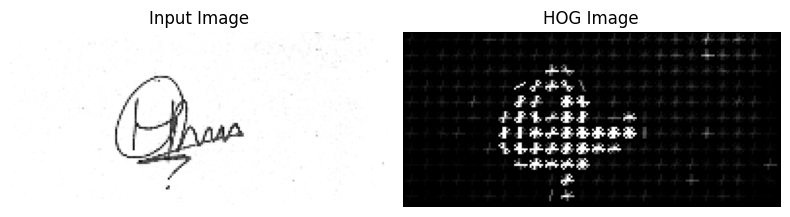

[0.32059512 0.         0.30407242 ... 0.         0.         0.        ]
(8280,)


In [6]:
from skimage.feature import hog
import matplotlib.pyplot as plt
from skimage import exposure
import cv2 as cv

# Read your image using OpenCV
img = cv.imread('images/Hgeniun/IMG_6249.JPG', cv.IMREAD_GRAYSCALE)  # Replace 'your_image_path.jpg' with your image path
print(img.shape)  # Check the shape of the image

# Resize the image if needed
resized_img = cv.resize(img, (194, 90))

# Compute HOG features
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True)

# Visualize the HOG image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(resized_img, cmap="gray")
plt.title('Input Image')
plt.axis('off')

plt.subplot(1, 2, 2)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))  # Rescale intensity for better visualization
plt.imshow(hog_image_rescaled, cmap="gray")
plt.title('HOG Image')
plt.axis('off')

plt.tight_layout()
plt.show()


print(fd)

print(fd.shape)

In [ ]:
# laplacian filter with padding

import math
import numpy as np
import cv2 as cv
import pandas as pd
img1= cv.imread("images/good/sign1.jpeg", cv.IMREAD_GRAYSCALE)

img = img1

def laplacian(img):
 
    bits = int(2 ** math.ceil(math.log(img.max(),2) / math.log(2,2)))

    print(bits)

    print(f"given image is of {round(math.log(bits,2))} bits")

    height, width = img.shape
    img_arr = None
    img_arr = np.zeros_like(img)
    img_arr.shape
    for i in range(1,height-2):
        for j in range(1,width-2):
            # code here
            new_value = None
            new_value= (-4*img[i,j] + img[i-1,j] + img[i+1,j] + img[i,j+1] - img[i,j-1]) 
            if new_value>-210:
                img_arr[i,j] = 0
            else:
                img_arr[i,j] = 255

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    #plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 2)
    plt.title('Image after Laplacian filter')
    plt.imshow(img_arr, cmap='gray')
    plt.axis('off')
#laplacian(img)


img_laplace = cv.imread("images/good/sign1.jpeg", cv.IMREAD_GRAYSCALE)
laplacian(img_laplace)

In [3]:
# reading multiple files from a path in a single shot
import cv2 as cv
import os

# Directory path containing images
directory = 'images//good'

# List to store images
images = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Check for image extensions
        filepath = os.path.join(directory, filename)
        image = cv.imread(filepath, cv.IMREAD_GRAYSCALE)
        #image = image.resize(128,128)
        if image is not None:
            image = cv.resize(image, (128, 128))
            images.append(image)
        else:
            print(f"Could not read {filename}")

# 'images' list contains all the images read
for image in images:
    print(image.shape)

#images list contains all the images now

(128, 128)
(128, 128)
(128, 128)


In [4]:
df = pd.DataFrame()
df

NameError: name 'pd' is not defined

In [5]:
# all the images are of 128,128 let's flatten it, and store it in datafram

# Considering we are reading all the good images thus target = 1
import numpy as np
import pandas as pd

df = pd.DataFrame()
for image in images:
    arr = image.flatten()
    new_row = arr.reshape(16384)
    print(new_row.shape)
    # Convert the new row to a DataFrame
    new_row_df = pd.DataFrame([new_row])
    # Concatenate the existing DataFrame with the new row DataFrame
    df = pd.concat([df, new_row_df], ignore_index=True)


df.head()
    
    
    
    

(16384,)
(16384,)
(16384,)


,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,64,74,150,152,159,162,160,163,165,175,...,50,45,41,26,29,29,24,61,57,28
1,161,159,160,159,158,156,154,155,159,166,...,127,122,94,65,53,45,54,70,93,104
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,254,254,255,255,254


<pre>
1. Convert resultant image  to a feature vector and pass it to the model
2. Since all the values will be given so just fill null values with mean value and pass it to the model

<pre>

In [6]:
# adding target column in the dataframe

target_column = 1 
df['target'] = target_column
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,target
0,64,74,150,152,159,162,160,163,165,175,...,45,41,26,29,29,24,61,57,28,1
1,161,159,160,159,158,156,154,155,159,166,...,122,94,65,53,45,54,70,93,104,1
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,254,254,255,255,254,1


In [9]:
# all the images are of 128,128 let's flatten it, and store it in datafram

# Considering we are reading all the good images thus target = 1
import numpy as np
import pandas as pd

for image in images:
    arr = image.flatten()
    new_row = arr.reshape(16384)
    print(new_row.shape)
    # Convert the new row to a DataFrame
    new_row_df = pd.DataFrame([new_row])
    # Concatenate the existing DataFrame with the new row DataFrame
    df = pd.concat([df, new_row_df], ignore_index=True)


df.head()

(16384,)
(16384,)
(16384,)


,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,target
0,64,74,150,152,159,162,160,163,165,175,...,45,41,26,29,29,24,61,57,28,1.0
1,161,159,160,159,158,156,154,155,159,166,...,122,94,65,53,45,54,70,93,104,1.0
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,254,254,255,255,254,1.0
3,64,74,150,152,159,162,160,163,165,175,...,45,41,26,29,29,24,61,57,28,NaN
4,161,159,160,159,158,156,154,155,159,166,...,122,94,65,53,45,54,70,93,104,NaN


In [11]:
# adding target column in the dataframe
'''
start_index = 1
end_index = 3

# Define the value you want to fill in the specified range
value_to_fill = 'X'

# Fill values within the specified index range in column 'B'
df.iloc[start_index:end_index + 1, df.columns.get_loc('B')] = value_to_fill

'''
target_column = 0
df = df.fillna(0) #target_column
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,target
0,64,74,150,152,159,162,160,163,165,175,...,45,41,26,29,29,24,61,57,28,1.0
1,161,159,160,159,158,156,154,155,159,166,...,122,94,65,53,45,54,70,93,104,1.0
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,254,254,255,255,254,1.0
3,64,74,150,152,159,162,160,163,165,175,...,45,41,26,29,29,24,61,57,28,0.0
4,161,159,160,159,158,156,154,155,159,166,...,122,94,65,53,45,54,70,93,104,0.0


In [ ]:
df.iloc[:,:-1]

In [12]:
# Passing the model to the SVM for predictions
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1] # all features excluding target value
y = df['target']

x_train, x_test , y_train, y_test = train_test_split(x, y,test_size = 0.2 , random_state = 42)


In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report



# Create the Support Vector Machine classifier
svm = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.

# Train the classifier
svm.fit(x_train, y_train)

# Make predictions
predictions = svm.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.0
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



d:\One Drive Data\7th Semester\Digital Image Processing\My Programs\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\One Drive Data\7th Semester\Digital Image Processing\My Programs\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\One Drive Data\7th Semester\Digital Image Processing\My Programs\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter 

HOG vector shape: (35532,)
HOG vector: 35532 35532


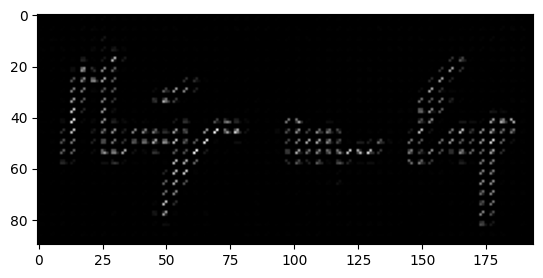

In [17]:
from skimage.feature import hog
from skimage import io
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def compute_hog(image_path, cell_size=(4, 4), block_size=(2, 2), bins=9):
    # Load the image using OpenCV and resize it
    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    image = cv.resize(image, (194, 90))
    
    # Compute HOG features
    hog_features, hog_image = hog(
        image,
        pixels_per_cell=cell_size,
        cells_per_block=block_size,
        orientations=bins,
        visualize=True,
        block_norm='L2-Hys'
    )
    
    # Reshape the HOG features to a single vector
    hog_vector = np.ravel(hog_features)
    
    return hog_vector, hog_image

# Path to your image
image_path = 'images/good/00100001.png'

# Compute HOG and get the output vector
hog_vector, hog_image = compute_hog(image_path)

# Display or use the HOG vector
print("HOG vector shape:", hog_vector.shape)
print("HOG vector:", len(hog_vector) , hog_vector.size)

plt.imshow(hog_image, cmap='gray')
plt.show()


In [ ]:
# Existing DataFrame
data = {'A': [1, 2, 3],
        'B': ['a', 'b', 'c']}
df = pd.DataFrame(data)

# New column to be added
new_column = [4, 5, 6]

# Insert the new column at a specific position (index=1) with label 'C'
df.insert(loc=2, column='C', value=new_column)

print(df)


In [ ]:
df['D'] = new_column
df